In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import pickle
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Set the ticker symbol for S&P 500
ticker_symbol = "^GSPC"

# Set the start date to a significantly earlier date
start_date = "1970-01-01"

# Set the end date to the current date
end_date = pd.to_datetime("today").strftime("%Y-%m-%d")

# Download historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop the NaN value in the first row (resulting from the percentage change calculation)
data = data.dropna()

# Print the DataFrame with historical returns
print(data[['Adj Close', 'Daily_Return']])


[*********************100%%**********************]  1 of 1 completed
              Adj Close  Daily_Return
Date                                 
1970-01-05    93.459999      0.004946
1970-01-06    92.820000     -0.006848
1970-01-07    92.629997     -0.002047
1970-01-08    92.680000      0.000540
1970-01-09    92.400002     -0.003021
...                 ...           ...
2023-11-13  4411.549805     -0.000836
2023-11-14  4495.700195      0.019075
2023-11-15  4502.879883      0.001597
2023-11-16  4508.240234      0.001190
2023-11-17  4514.020020      0.001282

[13590 rows x 2 columns]


<Axes: xlabel='Date'>

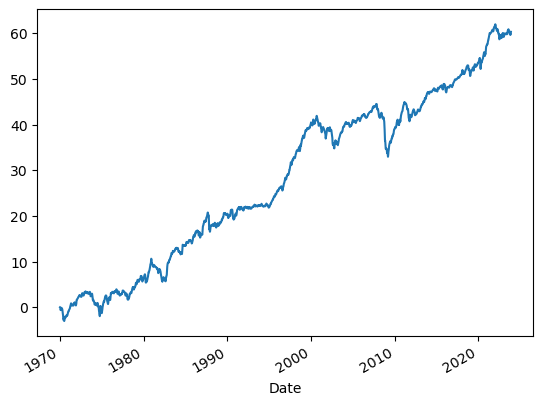

In [11]:
data.resample('M')['Daily_Return'].cumsum().cumsum().plot()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

In [20]:
data['Daily_Return'].autocorr()

-0.018370693262941076

(0.5, 367.0)

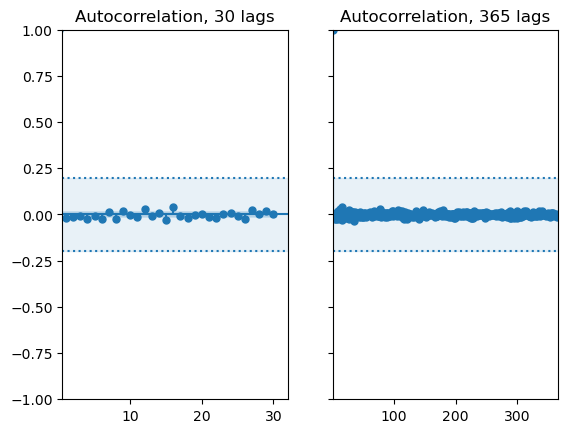

In [58]:
fig, ax = plt.subplots(1, 2, sharey=True)
i = 0
end = 30
plot_acf(data['Daily_Return'].values, lags=end, ax=ax[i], title=f"Autocorrelation, {end} lags")
ax[i].axhline(.2, linestyle=":")
ax[i].fill_between(np.linspace(0, end+2, end+2), np.ones(end+2)*.2, np.ones(end+2)*-.2, alpha=.1, color="tab:blue")
ax[i].axhline(-.2, linestyle=":")
ax[i].set_xlim(.5, end+2)

i = 1
end = 365
plot_acf(data['Daily_Return'].values, lags=end, ax=ax[i], title=f"Autocorrelation, {end} lags")
ax[i].axhline(.2, linestyle=":")
ax[i].fill_between(np.linspace(0, end+2, end+2), np.ones(end+2)*.2, np.ones(end+2)*-.2, alpha=.1, color="tab:blue")
ax[i].axhline(-.2, linestyle=":")
ax[i].set_xlim(.5, end+2)

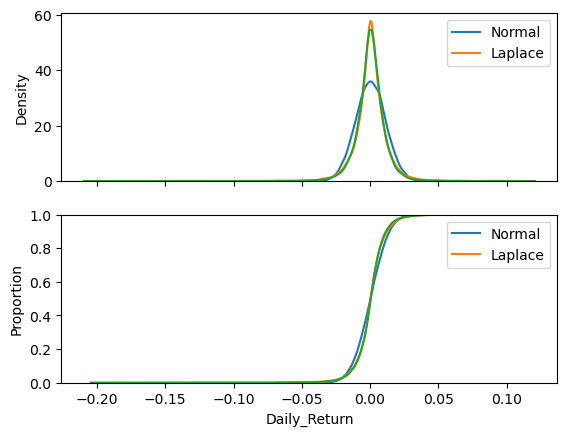

In [98]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.kdeplot(np.random.normal(data['Daily_Return'].mean(), data['Daily_Return'].std(), data['Daily_Return'].size), ax=ax[0], label="Normal")
sns.kdeplot(np.random.laplace(data['Daily_Return'].median(), np.abs(data['Daily_Return'] - data['Daily_Return'].median()).mean(), data['Daily_Return'].size), ax=ax[0], label="Laplace")
sns.kdeplot(data['Daily_Return'], ax=ax[0])
ax[0].legend()

sns.ecdfplot(np.random.normal(data['Daily_Return'].mean(), data['Daily_Return'].std(), data['Daily_Return'].size), ax=ax[1], label="Normal")
sns.ecdfplot(np.random.laplace(data['Daily_Return'].median(), np.abs(data['Daily_Return'] - data['Daily_Return'].median()).mean(), data['Daily_Return'].size), ax=ax[1], label="Laplace")
sns.ecdfplot(data['Daily_Return'], ax=ax[1])
ax[1].legend()

In [77]:
data['Daily_Return'].mean()

0.0003449289727837065

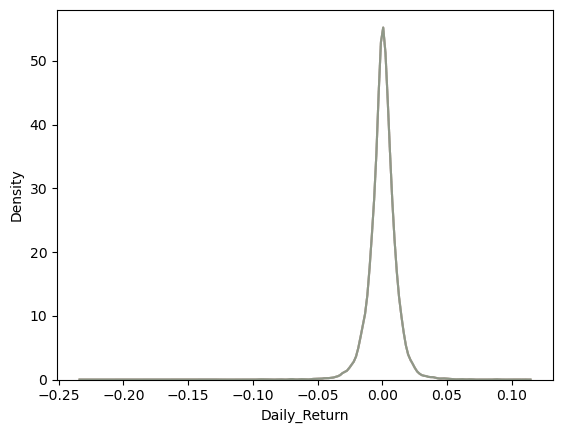

In [75]:
fig, ax = plt.subplots()
for i in range(10):
    sns.kdeplot(np.log(data['Daily_Return']+1).sample(frac=1), ax=ax, alpha=.2)

In [ ]:
np.